In [106]:
import pandas as pd
import numpy as np

# Load in data
## Sector Breakdown Codes
#### DE Related Breakdown Codes
- B7 - Machine SW tooling
- B7 - Procedure issue​
- B7 - Queue definition NOK​
- B7 - Sequence issue​
- B8 - Design (HW/SW)​

#### TF Related Breakdown Codes
- B0 - Undefined​
- B3 - Giving training​
- B3 - Logging redundant or unnecessary​
- B3 - Material damaged contaminated lost​
- B3 - No manpower​
- B3 - Procedure / process is not followed​
- B3 - Skills / training needed​
- B4 - Availability Toolcabin​
- B4 - Defect/Incompl/Calibrate Toolcabin​
- B4 - Tool Contaminated Toolcabin​
- B4 - Tooling Own Workcenter​
- B5 - Facility​
- B6 - MMT Support software tooling​
- B9 - Process Lab​

#### Supply Chain Breakdown Codes
- B1 – Material Availability​

In [107]:
cabin_data = pd.read_csv("./NXT Wet Platform DN&AIR - Tiered Ownership.csv")
air_data = pd.read_csv('./AIR_Data wk2608.csv')

cabin_data = pd.merge(
    left=cabin_data, 
    right=air_data[['AIR_ISSUE_NUMBER', 'AIR_ISSUE_STATUS']], 
    left_on='Air_Issue_number', 
    right_on='AIR_ISSUE_NUMBER',
    how='left')

cabin_data = cabin_data.drop_duplicates(subset=['NOTIFICATION_NUMBER']) # to prevent adding the same breakdown duration more than once

SF_dict = {
    'SF-01': ['FC-024', 'FC-025', 'FC-026', 'FC-027', 'FC-040', 'FC-056'],
    'SF-02': ['FC-021', 'FC-022', 'FC-023', 'FC-041'],
    'SF-03': ['FC-019', 'FC-020', 'FC-033'],
    'SF-04': ['FC-014', 'FC-057'],
    'SF-05': ['FC-001'], 
    'SF-06': ['FC-002'], 
    'SF-07': ['FC-003', 'FC-048', 'FC-050'],
    'SF-08': ['FC-004'],
    'SF-09': ['FC-031'],
    'SF-10': ['FC-009', 'FC-010', 'FC-011', 'FC-012', 'FC-015', 'FC-038', 'FC-086'],
    'SF-11': ['FC-059', 'FC-061', 'FC-062', 'FC-063', 'FC-064', 'FC-065'],
    'SF-12': ['FC-006', 'FC-008'], 
    'SF-13': ['FC-005', 'FC-007', 'FC-044', 'FC-054'],
    'SF-14': ['FC-028', 'FC-029', 'FC-042', 'FC-060'],
    'SF-21': ['FC-032'],
    'SF-83': ['FC-085', 'FC-227', 'FC-228', 'FC-229'],
    'SF-84': ['FC-221', 'FC-217', 'FC-218'],
    'SI-00': ['IC-011', 'IC-101', 'IC-102', 'IC-103'],
    'SI-01': ['IC-001', 'IC-002', 'IC-003', 'IC-004', 'IC-005', 'IC-015', 'IC-031', 'IC-034', 'IC-037', 'IC-104'],
    'SI-02': ['IC-008', 'IC-009', 'IC-010', 'IC-016', 'IC-017', 'SCI-108', 'SCI-109', 'SCI-110', 'SCI-116'], 
    'SI-03': ['IC-006', 'IC-007', 'IC-013', 'IC-018', 'IC-019', 'SCI-106', 'SCI-107', 'SCI-118']}

sector_breakdowns_dict = {
    'DE Breakdown': [
        'B7 - Machine SW tooling (see comment)', 
        'B7 - Procedure issue', 
        'B7 - Queue definition NOK', 
        'B7 - Sequence issue', 
        'B8 - Design (HW/SW)'
        ],

    'TF Breakdown': [
        'B0 - Undefined', 
        'B3 - Giving training',
        'B3 - Logging redundant or unnecessary',
        'B3 - Material damaged contaminated lost',
        'B3 - No manpower',
        'B3 - Procedure / process is not followed',
        'B3 - Skills / training needed',
        'B4 - Availability Toolcabin',
        'B4 - Defect/Incompl/Calibrate Toolcabin',
        'B4 - Tool Contaminated Toolcabin',
        'B4 - Tooling Own Workcenter',
        'B5 - Facility',
        'B6 - MMT Support software tooling',
        'B9 - Process Lab'
        ],

    'Supply Chain Breakdown': [
        'B1 - Material Availability'
        ],
    
    'B2' : [
        'B2 - Materials quality/ Upstream quality'
    ]
}

cabin_data['SF'] = cabin_data['Functional_Cluster_Final_Owner'].map({fc: sf for sf, fc_list in SF_dict.items() for fc in fc_list}) # assign the fc to the correct SF
cabin_data['Sector'] = cabin_data['B_CODE'].map({code: sector for sector, code_list in sector_breakdowns_dict.items() for code in code_list}) # assing bcode to the correct sector
cabin_data = cabin_data.dropna(subset=['SF', 'Sector']) # drop the rows where the FC could not be assigned to a SF and Sector is not assigned
cabin_data['AIR_bucket'] = np.where(
    cabin_data['AIR_ISSUE_STATUS'].isin(['Open', 'On Hold']), 
    'Open/On Hold AIR', 
    np.where(
        cabin_data['AIR_ISSUE_STATUS'].isin(['Closed', 'Aborted']),
        'Closed/Aborted AIR',
        'No AIR'
        )
    )

print(cabin_data['MACHINE_TYPE'].unique())
print(cabin_data['Air_Issue_number'].unique().tolist()) #print list to use in SSA to get latest Status updates




['NXT1980FI' 'NXT1980F' 'NXT:2050']
[nan, 'P682473', 'P610897', 'P788911', 'P746919', 'P869295', 'P335411', 'P756702', 'P487604', 'P758582', 'P592959', 'P815240', 'P699157', 'P671050', 'P804089', 'P744281', 'P791006', 'P745976', 'P745977', 'P705899', 'P804094', 'P480554', 'P804732', 'P763043', 'P476526', 'P757962', 'P480555', 'P672983', 'P691140', 'P696910', 'P782146', 'P674362', 'P746315', 'P573277', 'P694638', 'P471070', 'P822407', 'P770244', 'P788324', 'P573572', 'P739503', 'P791635', 'P698111', 'P654122', 'P334895', 'P573538', 'P742135', 'P810327', 'P814765', 'P784778', 'P671882', 'P578807', 'P757381', 'P799586', 'P818574', 'P643330', 'P759504', 'P721159', 'P797085', 'P685701', 'P820233', 'P630308', 'P699524', 'P674441', 'P710246', 'P751657', 'P726077', 'P826026', 'P782752', 'P789244', 'P741000', 'P519749', 'P734042', 'P766580', 'P693395', 'P667196', 'P700293', 'P757714', 'P480596', 'P848879', 'P675743', 'P776480', 'P683006', 'P636258', 'P600633', 'P676820', 'P779826', 'P765457', '

# Plots

## Pie Charts

### Pie charts

#### NXT1980FI & NXT1980F

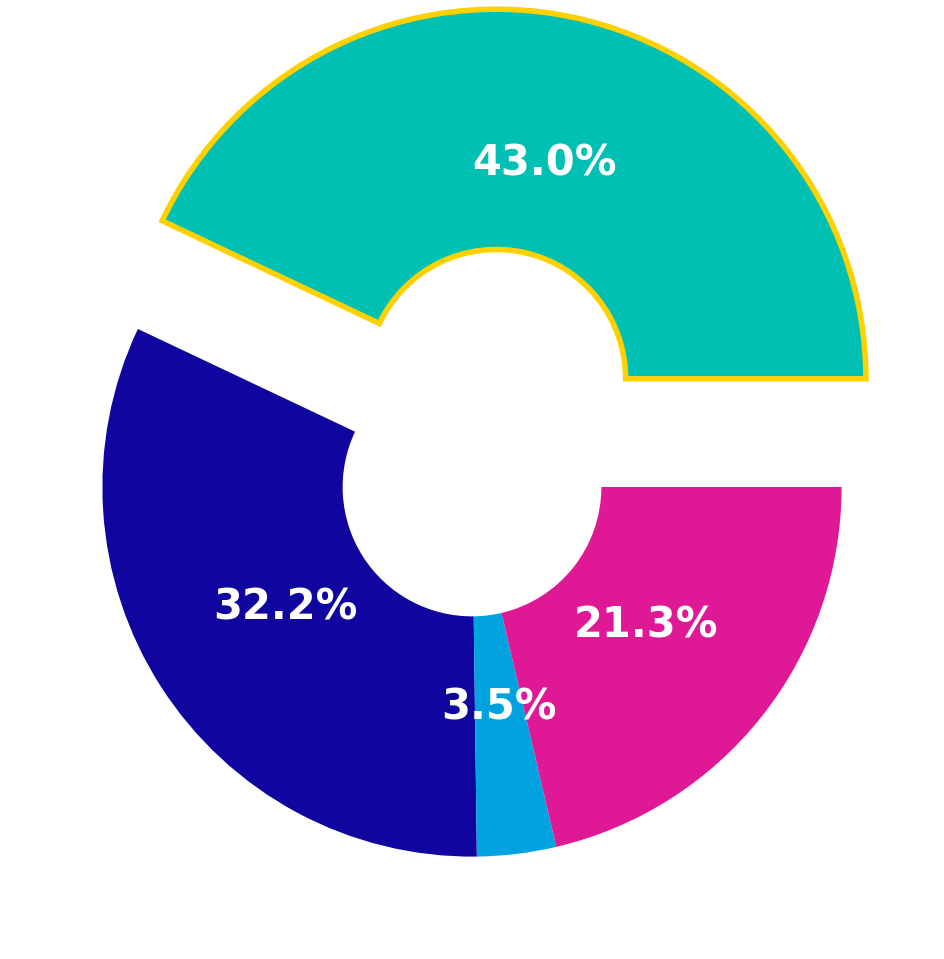

In [108]:
ax = cabin_data.loc[
    (cabin_data['MACHINE_TYPE'].isin(['NXT1980FI','NXT1980F']))
].groupby('Sector')['BREAKDOWN_DURATION_HRS'].sum().plot.pie(
    autopct='%1.1f%%',
    figsize=(12,12),
    labels=None,
    # legend=True,
    colors=['#00BFB3','#10069F','#00A3E0','#DF1995'],
    textprops={'color':'white','fontweight':'bold','fontsize':30},
    wedgeprops={'linewidth':0,'edgecolor':'white','width':0.65},
    explode=[0.3, 0, 0, 0]
)

ax.get_figure().patch.set_facecolor("none")
ax.set_ylabel("")

# --- Add outline ONLY to the DE slice ---
wedges = ax.patches
index_order = list(cabin_data.loc[
    (cabin_data['MACHINE_TYPE'].isin(['NXT1980FI','NXT1980F']))
].groupby('Sector')['BREAKDOWN_DURATION_HRS'].sum().index)

de_idx = index_order.index("B2")

for i, w in enumerate(wedges):
    if i == de_idx:
        w.set_edgecolor("#FFD100")
        w.set_linewidth(4)      # strong outline
    else:
        w.set_edgecolor("none") # remove outline on other slices

#### NXT2050

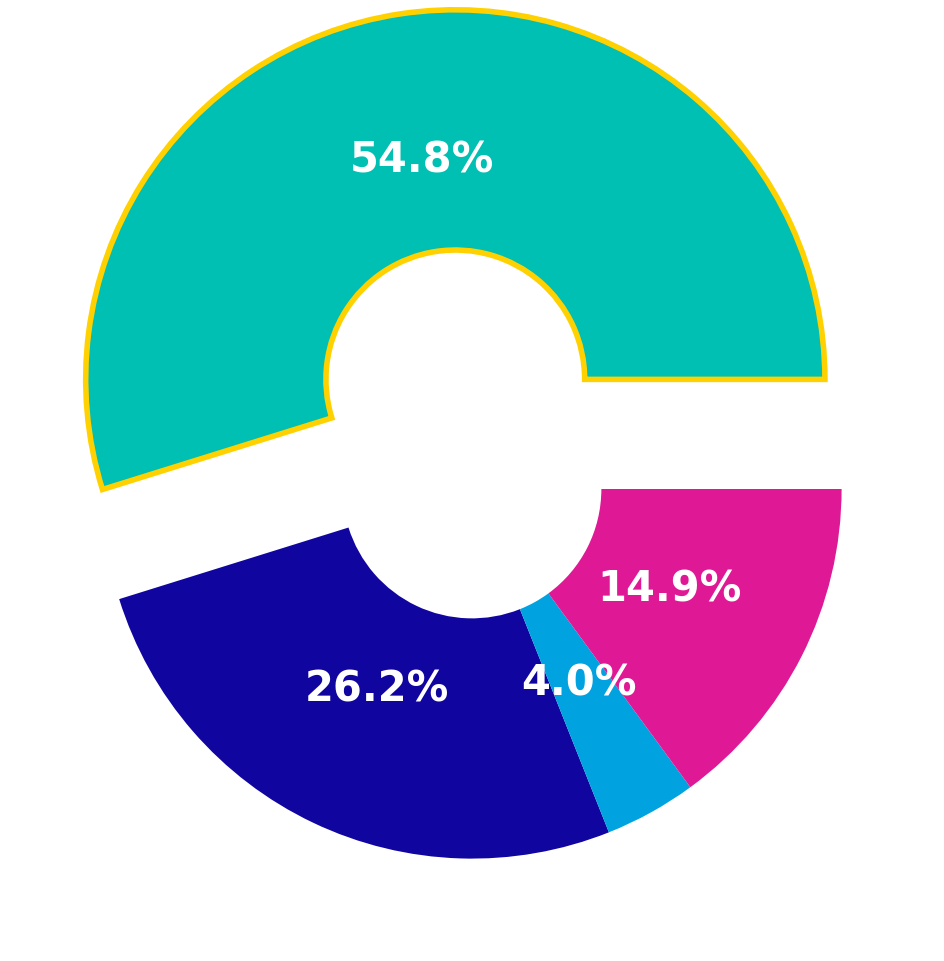

In [109]:
ax = cabin_data.loc[
    (cabin_data['MACHINE_TYPE'].isin(['NXT:2050']))
].groupby('Sector')['BREAKDOWN_DURATION_HRS'].sum().plot.pie(
    autopct='%1.1f%%',
    figsize=(12,12),
    labels=None,
    # legend=True,
    colors=['#00BFB3','#10069F','#00A3E0','#DF1995'],
    textprops={'color':'white','fontweight':'bold','fontsize':30},
    wedgeprops={'linewidth':0,'edgecolor':'white','width':0.65},
    explode=[0.3, 0, 0, 0]
)

ax.get_figure().patch.set_facecolor("none")
ax.set_ylabel("")

# --- Add outline ONLY to the DE slice ---
wedges = ax.patches
index_order = list(cabin_data.loc[
    (cabin_data['MACHINE_TYPE'].isin(['NXT1980FI','NXT1980F']))
].groupby('Sector')['BREAKDOWN_DURATION_HRS'].sum().index)

de_idx = index_order.index("B2")

for i, w in enumerate(wedges):
    if i == de_idx:
        w.set_edgecolor("#FFD100")
        w.set_linewidth(4)      # strong outline
    else:
        w.set_edgecolor("none") # remove outline on other slices

## Bar charts

#### NXT1980FI & NXT1980F (Open/On Hold AIR vs No AIR)

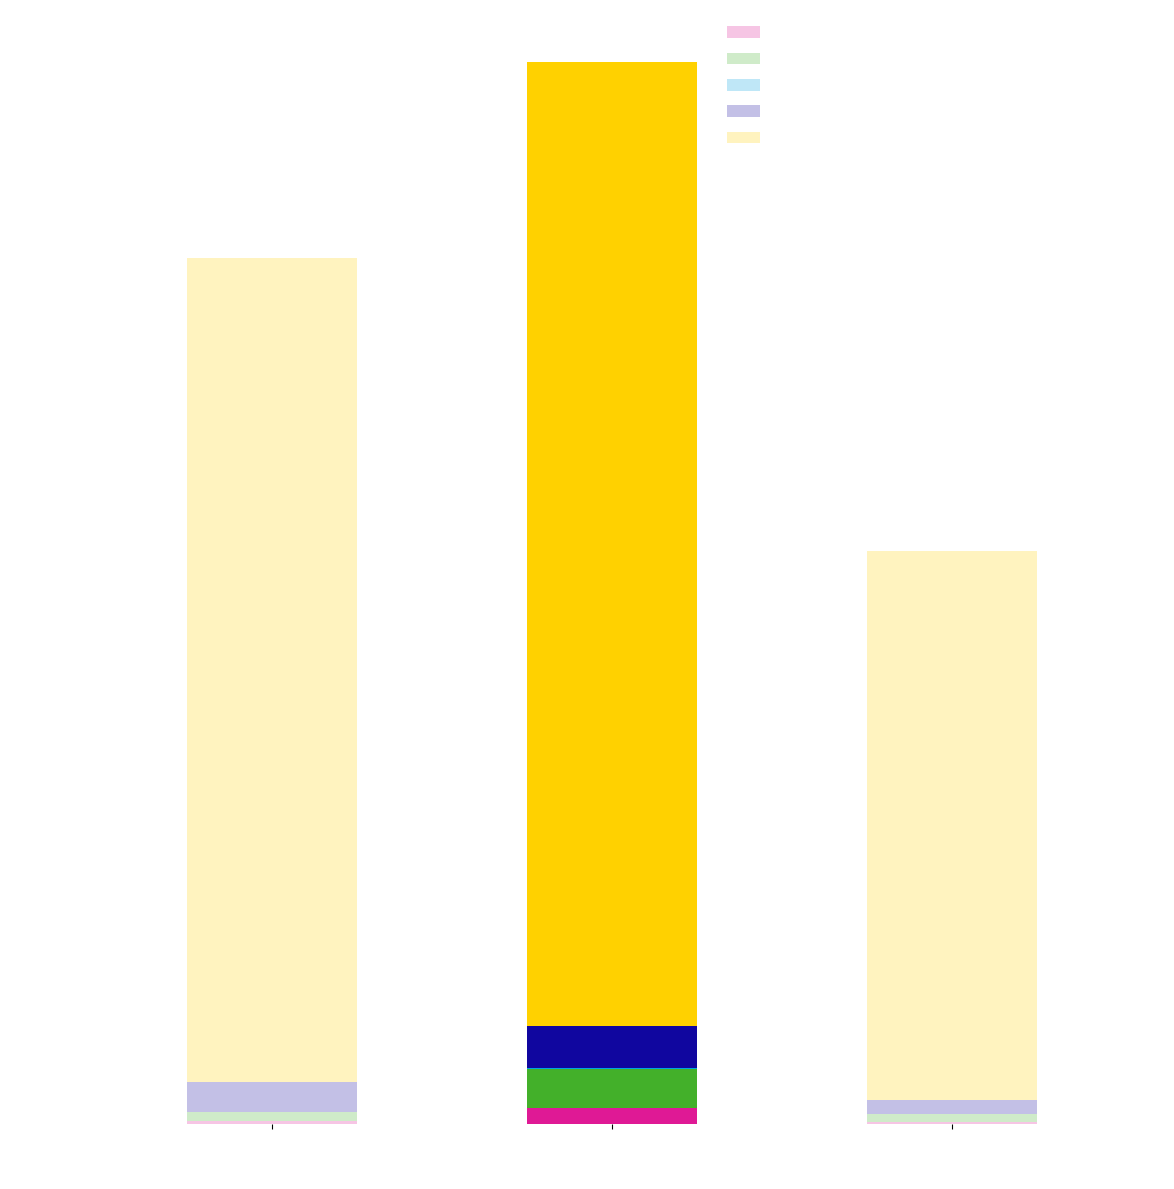

In [117]:
import matplotlib.pyplot as plt
import seaborn as sns

# Prepare data
df = cabin_data.loc[
    (cabin_data['MACHINE_TYPE'].isin(['NXT1980FI','NXT1980F'])) &
    (cabin_data['Sector'] == 'DE Breakdown')
].pivot_table(
    index='AIR_bucket',
    columns='B_CODE',
    values='BREAKDOWN_DURATION_HRS',
    aggfunc='sum'
)

# Create transparent figure + axes
fig, ax = plt.subplots(figsize=(12, 12), facecolor="none")
ax.set_facecolor("none")

# Plot stacked bars
df.plot(
    kind="bar",
    stacked=True,
    ax=ax,
    color=['#DF1995','#43B02A','#00A3E0','#10069F','#FFD100'],
    edgecolor="none"
)

# --- OPACITY BY AIR_bucket (index) ---
highlight_bucket = "No AIR"   # <-- exact value from df.index
# For each stacked series (container), set alpha for each row (patch) by index match
for container in ax.containers:
    # patches are ordered the same as df.index
    for i, bar in enumerate(container.patches):
        bucket = df.index[i]
        bar.set_alpha(1.0 if bucket == highlight_bucket else 0.25)
# -------------------------------------

# Make x-axis labels horizontal + bigger
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=0,
    ha='center',
    fontsize=34,
    color="white"
)

# Labels with bigger fonts
ax.set_ylabel("Breakdown Hours", color="white", fontsize=16)
ax.set_xlabel("", fontsize=16)

# Tick parameter font sizes
ax.tick_params(axis='y', colors="white", labelsize=16)

# Make legend transparent + bigger font
leg = ax.legend(fontsize=12)
leg.get_frame().set_facecolor("none")
leg.get_frame().set_edgecolor("none")
leg.get_frame().set_linewidth(0)

for txt in leg.get_texts():
    txt.set_color("white")

# Remove spines
for spine in ax.spines.values():
    spine.set_color("none")

plt.tight_layout()
plt.show()

#### NXT1980FI & NXT1980F (Open/On Hold AIR per SF)

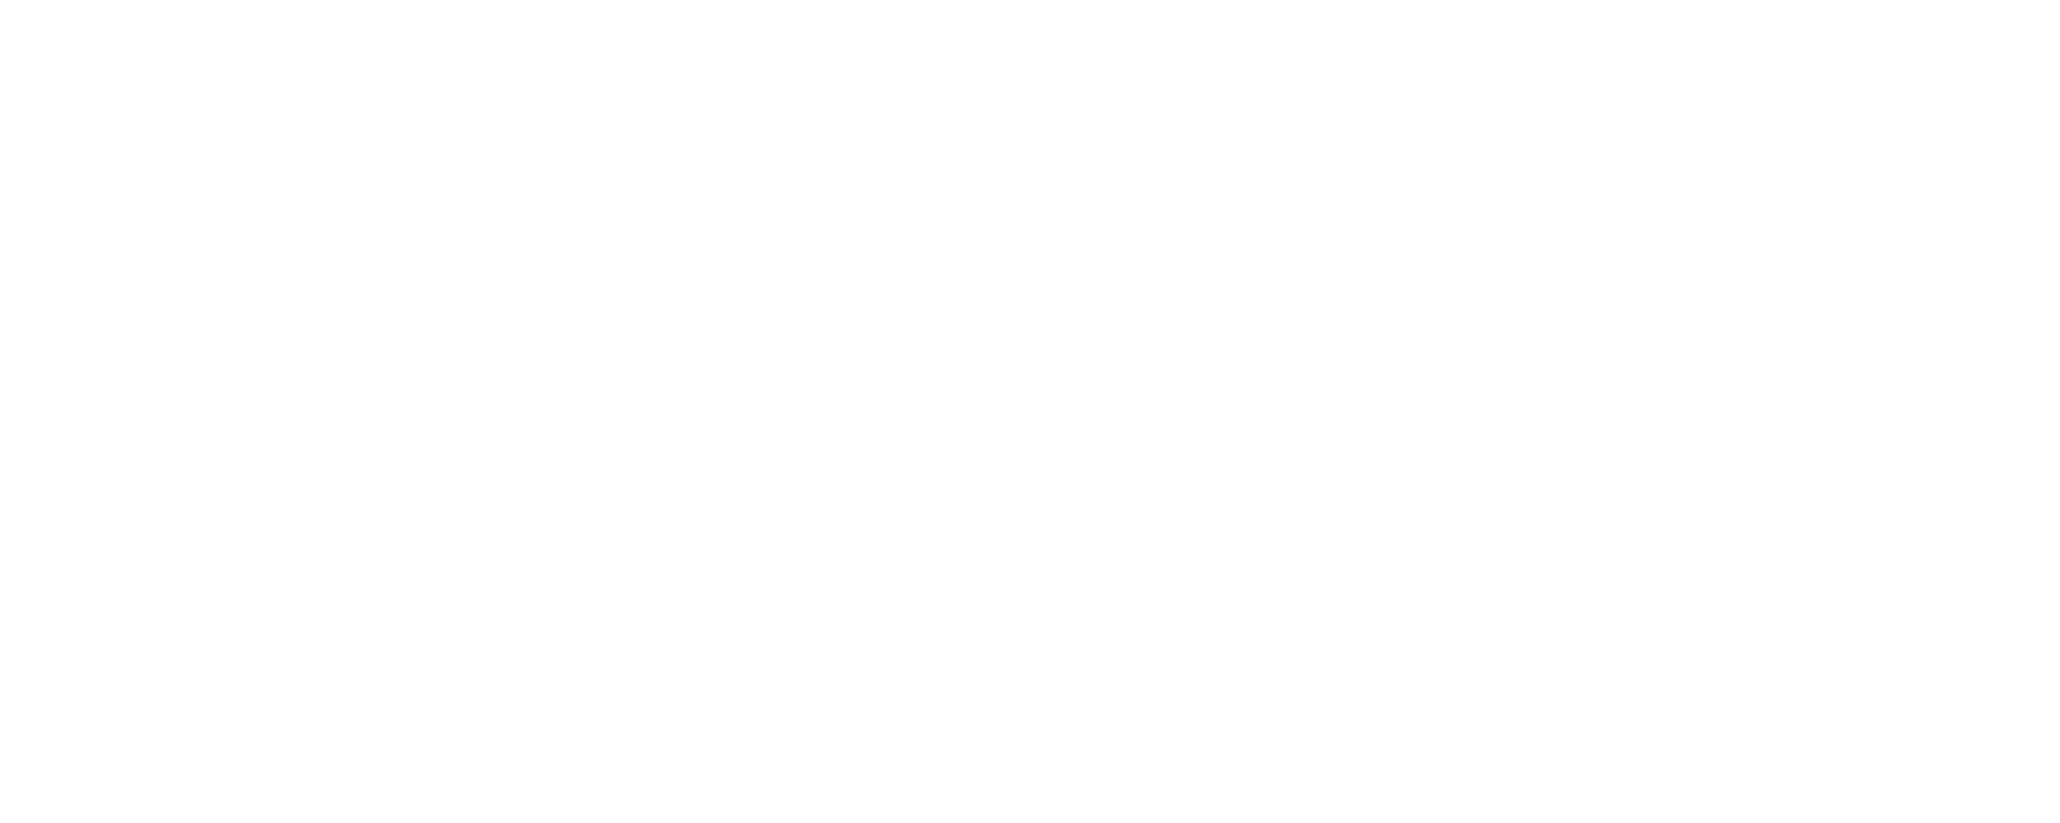

In [111]:
ax = cabin_data.loc[
    (cabin_data['MACHINE_TYPE'].isin(['NXT1980FI','NXT1980F'])) &
    (cabin_data['Sector'] == 'DE Breakdown') &
    (cabin_data['AIR_bucket'] == 'Open/On Hold AIR')
].groupby('SF')['BREAKDOWN_DURATION_HRS'].sum().plot.bar(
    stacked=True,
    figsize=(25,10),
    color=[
        '#FFFFFF25',
        '#FFFFFF25',
        '#FFFFFF25',
        '#FFFFFF25',
        '#FFFFFF25',
        '#FFFFFF25',
        '#FFFFFF25',
        '#FFFFFF25',
        '#FFFFFF25',
        '#FFFFFF25',
        '#FFFFFF25',
        '#FFFFFF25',
        '#FFFFFF25',
        '#FFFFFF25',
        '#FFFFFF25',
        '#FFFFFF',
    ],
    rot=0,
    xlabel='',
    fontsize=18
)

# Y‑label
ax.set_ylabel('Breakdown Hours', fontsize=18, color="white")

# --- FULL BACKGROUND TRANSPARENCY ---
ax.set_facecolor("none")                    # transparent plot area
ax.patch.set_facecolor("none")              # remove axes rectangle
ax.get_figure().patch.set_facecolor("none") # remove figure background

# Remove spines
for spine in ax.spines.values():
    spine.set_color("none")

# --- MAKE ALL TEXT WHITE ---
ax.tick_params(axis='x', colors='white', labelsize=18)
ax.tick_params(axis='y', colors='white', labelsize=18)

for label in ax.get_xticklabels():
    label.set_color("white")

for label in ax.get_yticklabels():
    label.set_color("white")

ax.set_xlabel("", color="white")

# --- ADD WHITE HORIZONTAL GRIDLINES (20% opacity) ---
ax.yaxis.grid(True, which='major', linestyle='-', linewidth=1, color='white', alpha=0.2)
ax.set_axisbelow(True)   # ensures grid appears behind the bar

#### NXT2050 (Open/On Hold AIR vs No AIR)

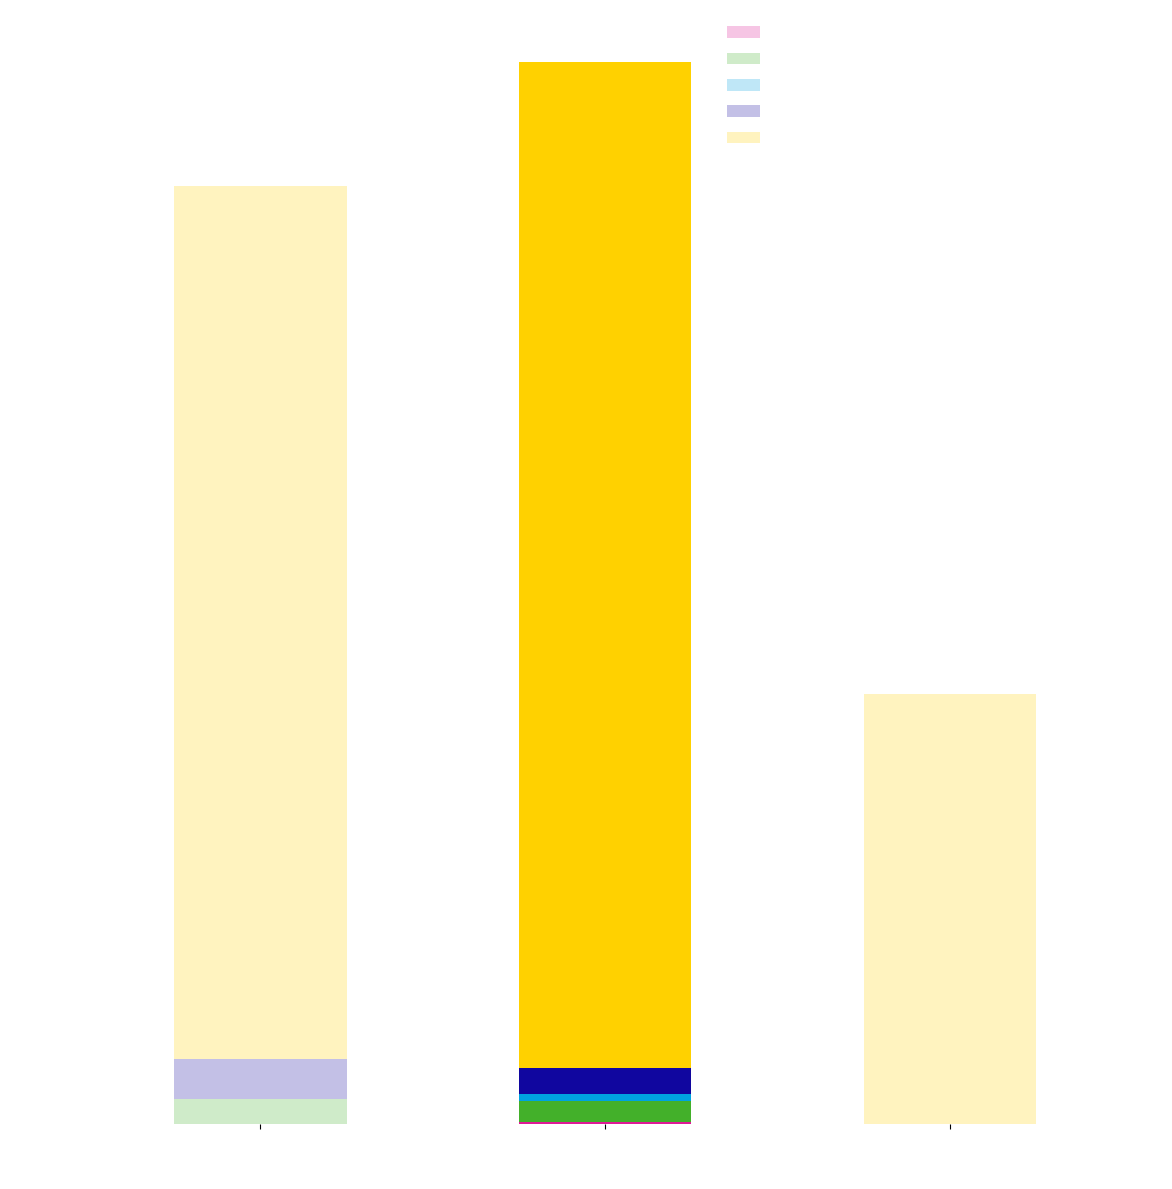

In [118]:
import matplotlib.pyplot as plt
import seaborn as sns

# Prepare data
df = cabin_data.loc[
    (cabin_data['MACHINE_TYPE'].isin(['NXT:2050'])) &
    (cabin_data['Sector'] == 'DE Breakdown')
].pivot_table(
    index='AIR_bucket',
    columns='B_CODE',
    values='BREAKDOWN_DURATION_HRS',
    aggfunc='sum'
)

# Create transparent figure + axes
fig, ax = plt.subplots(figsize=(12, 12), facecolor="none")
ax.set_facecolor("none")

# Plot stacked bars
df.plot(
    kind="bar",
    stacked=True,
    ax=ax,
    color=['#DF1995','#43B02A','#00A3E0','#10069F','#FFD100'],
    edgecolor="none"
)

# --- OPACITY BY AIR_bucket (index) ---
highlight_bucket = "No AIR"   # <-- exact value from df.index
# For each stacked series (container), set alpha for each row (patch) by index match
for container in ax.containers:
    # patches are ordered the same as df.index
    for i, bar in enumerate(container.patches):
        bucket = df.index[i]
        bar.set_alpha(1.0 if bucket == highlight_bucket else 0.25)
# -------------------------------------

# Make x-axis labels horizontal + bigger
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=0,
    ha='center',
    fontsize=34,
    color="white"
)

# Labels with bigger fonts
ax.set_ylabel("Breakdown Hours", color="white", fontsize=16)
ax.set_xlabel("", fontsize=16)

# Tick parameter font sizes
ax.tick_params(axis='y', colors="white", labelsize=16)

# Make legend transparent + bigger font
leg = ax.legend(fontsize=12)
leg.get_frame().set_facecolor("none")
leg.get_frame().set_edgecolor("none")
leg.get_frame().set_linewidth(0)

for txt in leg.get_texts():
    txt.set_color("white")

# Remove spines
for spine in ax.spines.values():
    spine.set_color("none")

plt.tight_layout()
plt.show()

#### NXT2050 (Open/On Hold AIR per SF)

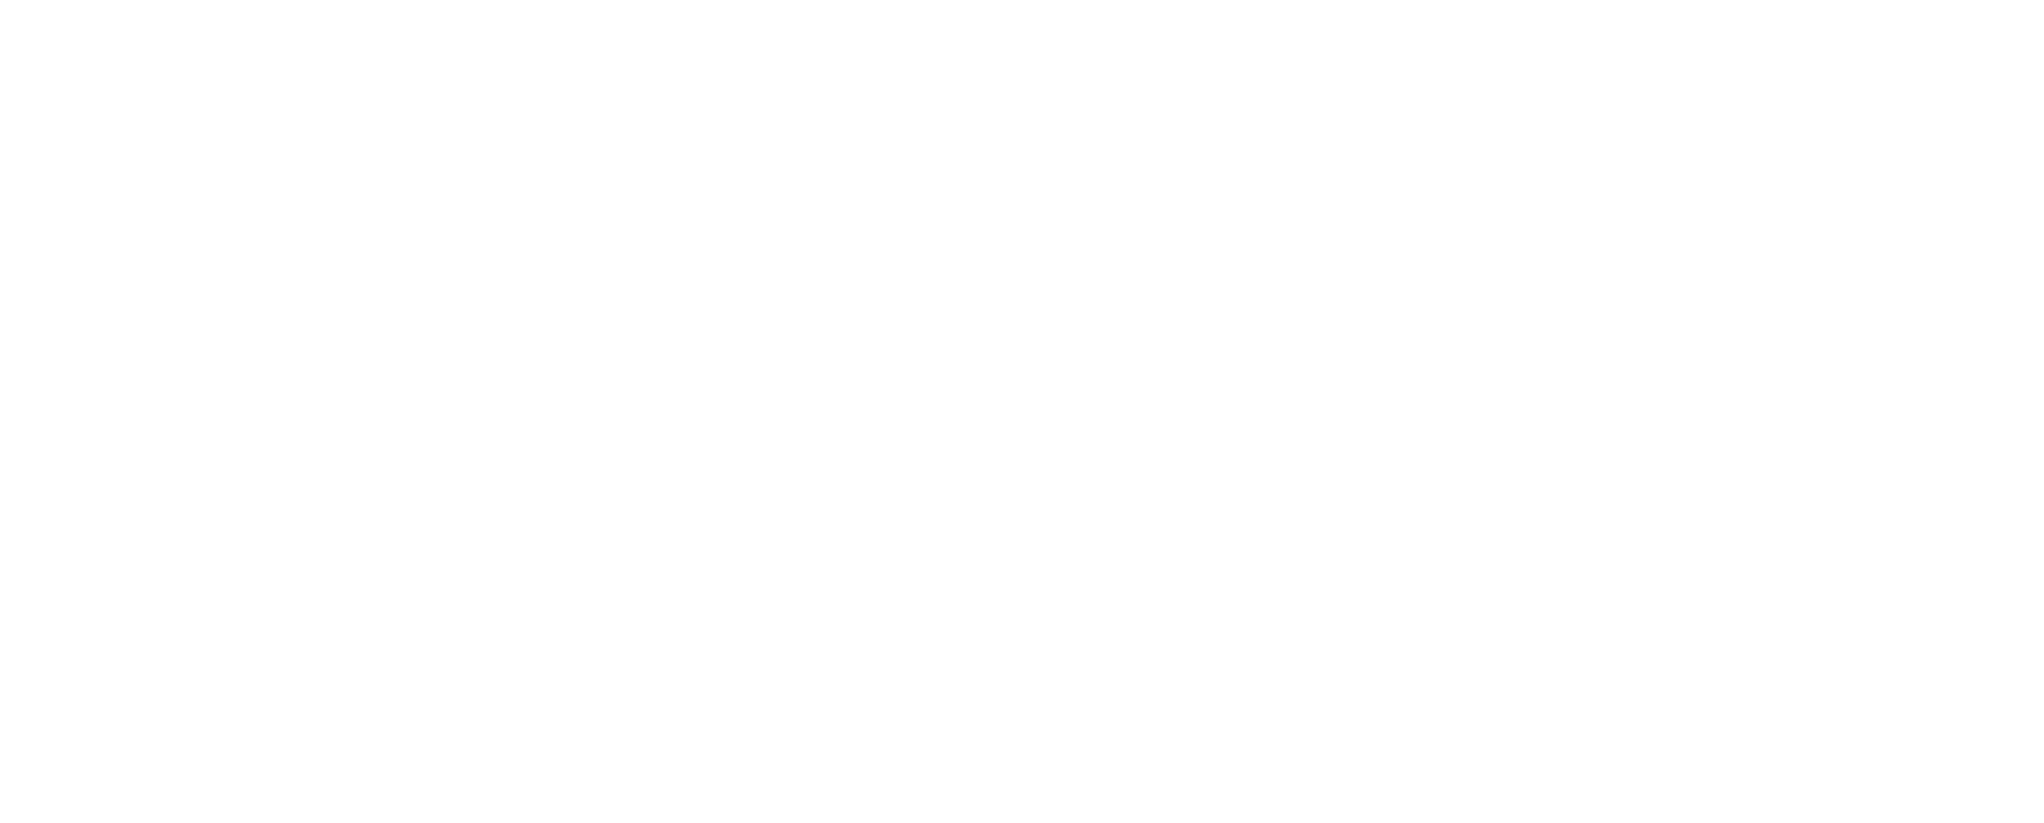

In [113]:
ax = cabin_data.loc[
    (cabin_data['MACHINE_TYPE'].isin(['NXT:2050'])) &
    (cabin_data['Sector'] == 'DE Breakdown') &
    (cabin_data['AIR_bucket'] == 'Open/On Hold AIR')
].groupby('SF')['BREAKDOWN_DURATION_HRS'].sum().plot.bar(
    stacked=True,
    figsize=(25,10),
    color=[
        '#FFFFFF25',   # highlighted bar
        '#FFFFFF25',
        '#FFFFFF25',
        '#FFFFFF25',
        '#FFFFFF25',
        '#FFFFFF25',
        '#FFFFFF25',
        '#FFFFFF25',
        '#FFFFFF25',
        '#FFFFFF',
    ],
    rot=0,
    xlabel='',
    fontsize=18
)

# Y‑label
ax.set_ylabel('Breakdown Hours', fontsize=18, color="white")

# --- FULL BACKGROUND TRANSPARENCY ---
ax.set_facecolor("none")                    # transparent plot area
ax.patch.set_facecolor("none")              # remove axes rectangle
ax.get_figure().patch.set_facecolor("none") # remove figure background

# Remove spines
for spine in ax.spines.values():
    spine.set_color("none")

# --- MAKE ALL TEXT WHITE ---
ax.tick_params(axis='x', colors='white', labelsize=18)
ax.tick_params(axis='y', colors='white', labelsize=18)

for label in ax.get_xticklabels():
    label.set_color("white")

for label in ax.get_yticklabels():
    label.set_color("white")

ax.set_xlabel("", color="white")

# --- ADD WHITE HORIZONTAL GRIDLINES (20% opacity) ---
ax.yaxis.grid(True, which='major', linestyle='-', linewidth=1, color='white', alpha=0.2)
ax.set_axisbelow(True)   # ensures grid appears behind the bar

## Groupings

In [114]:
cabin_data_1980 = cabin_data.loc[
    (cabin_data['MACHINE_TYPE'].isin(['NXT1980FI','NXT1980F'])) &
    (cabin_data['Sector']=='DE Breakdown') &
    (cabin_data['AIR_bucket']=='Open/On Hold AIR')
].groupby(['SF','Air_Issue_number']).agg({
    'BREAKDOWN_DURATION_HRS': 'sum',
    'AIR_ISSUE_STATUS': 'first',
    'Air_Issue_Summary': 'first',
    'B_CODE':'unique'
}).reset_index()
cabin_data_1980['Breakdown ave per machine [hrs]'] = cabin_data_1980['BREAKDOWN_DURATION_HRS']/79 #79 machines for inf->july 2025
cabin_data_1980['Cost [euros]'] = cabin_data_1980['Breakdown ave per machine [hrs]']*(9400/24) # 9400 euros/day from the TF slides


In [115]:
cabin_data_2050 = cabin_data.loc[
    (cabin_data['MACHINE_TYPE'].isin(['NXT:2050'])) &
    (cabin_data['Sector']=='DE Breakdown') &
    (cabin_data['AIR_bucket']=='Open/On Hold AIR')
].groupby(['SF','Air_Issue_number']).agg({
    'BREAKDOWN_DURATION_HRS': 'sum',
    'AIR_ISSUE_STATUS': 'first',
    'Air_Issue_Summary': 'first',
    'B_CODE':'unique'
}).reset_index()
cabin_data_2050['Breakdown ave per machine [hrs]'] = cabin_data_2050['BREAKDOWN_DURATION_HRS']/46 #46 machines for inf->july 2025
cabin_data_2050['Cost [euros]'] = cabin_data_2050['Breakdown ave per machine [hrs]']*(9400/24) # 9400 euros/day from the TF slides

In [116]:
target_machines = ['NXT:2050', 'NXT1980F', 'NXT1980FI']

# Filter to only these machine types
df_filtered = cabin_data.loc[
    (cabin_data['MACHINE_TYPE'].isin(target_machines)) &
    (cabin_data['Sector']=='DE Breakdown') &
    (cabin_data['AIR_bucket']=='Open/On Hold AIR')
    ]

# Group by Air_Issue_number and count unique machine types
shared_issues = (
    df_filtered.groupby('Air_Issue_number')['MACHINE_TYPE']
    .nunique()
    .reset_index()
)

print(shared_issues)

# # Keep only those shared across 2+ machine types
# shared_issues = shared_issues[shared_issues['MACHINE_TYPE'] >= 2]

# # Get as a Python list
# air_issue_list = shared_issues['Air_Issue_number'].tolist()


   Air_Issue_number  MACHINE_TYPE
0           P242060             2
1           P330712             2
2           P424724             1
3           P433407             1
4           P480554             1
..              ...           ...
86          P861946             1
87          P867840             1
88          P869295             2
89          P882063             1
90          P902060             1

[91 rows x 2 columns]
